In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data = pd.read_csv(r"C:\Users\sk062\Documents\Data\Google Search\Search.csv",encoding= "shift-jis")
Data["Data"] = pd.to_datetime(Data["Data"])
Data["Year"] = Data["Data"].dt.year
Data['Month'] = Data['Data'].dt.month
Data['Day'] = Data['Data'].dt.day
Data["Week_number"] = Data["Data"].dt.isocalendar().week

In [3]:
# Pythonでヒストグラムを書いて関数を算出。その後、対数変換もしくは標準化して標準正規分布にする。

In [5]:
# データの確認
Data.head()

,Data,AIR JORDAN,AIR FORCE,AIR MAX,DUNK,Year,Month,Day,Week_number
0,2019-12-15,43,22,62,6,2019,12,15,50
1,2019-12-22,47,22,65,4,2019,12,22,51
2,2019-12-29,51,26,100,3,2019,12,29,52
3,2020-01-05,44,20,74,4,2020,1,5,1
4,2020-01-12,41,23,68,4,2020,1,12,2


In [10]:
# Dataの記述統計量の確認
Data.describe()

,Data,AIR JORDAN,AIR FORCE,AIR MAX,DUNK,Year,Month,Day,Week_number
count,262,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.0
mean,2022-06-15 12:00:00,48.667939,30.637405,44.835878,7.522901,2021.954198,6.526718,15.797710,26.69084
min,2019-12-15 00:00:00,19.000000,15.000000,22.000000,2.000000,2019.000000,1.000000,1.000000,1.0
25%,2021-03-15 18:00:00,43.000000,23.250000,34.250000,4.000000,2021.000000,4.000000,8.000000,14.0
50%,2022-06-15 12:00:00,48.000000,30.500000,43.000000,6.000000,2022.000000,7.000000,16.000000,27.0
75%,2023-09-15 06:00:00,53.000000,37.000000,52.000000,8.000000,2023.000000,10.000000,23.000000,40.0
max,2024-12-15 00:00:00,94.000000,60.000000,100.000000,32.000000,2024.000000,12.000000,31.000000,53.0
std,NaN,9.574493,8.460536,13.273998,5.787873,1.437658,3.472560,8.797483,15.13793


(array([  0.,   4.,  10., 116.,  99.,  26.,   6.,   1.,   0.,   0.]),
 array([  0.,  12.,  24.,  36.,  48.,  60.,  72.,  84.,  96., 108., 120.]),
 <BarContainer object of 10 artists>)

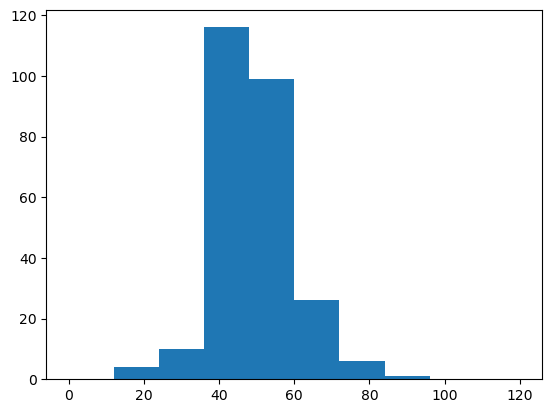

In [12]:
# AIR_JORDANのヒストグラムを描く

plt.hist( Data["AIR JORDAN"], range=(0,120))

In [18]:
from scipy.stats import gaussian_kde

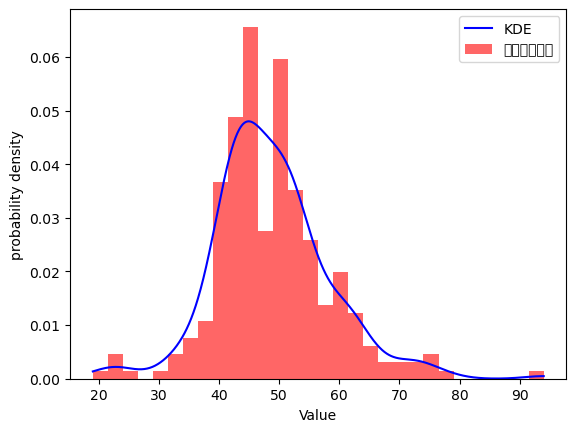

In [30]:
# AIR_JORDANの確率密度関数をしる。
kde = gaussian_kde(Data["AIR JORDAN"])

# PDFをプロットするためのx軸の値を生成
x = np.linspace(min(Data["AIR JORDAN"]), max(Data["AIR JORDAN"]), 1000)

# xの値でPDFを評価
pdf = kde(x)

# KDEとヒストグラムをプロット
plt.plot(x, pdf, label='KDE', color='b')
plt.hist(Data["AIR JORDAN"], bins=30, density=True, alpha=0.6, color='r', label='ヒストグラム')
plt.xlabel('Value')  # 値
plt.ylabel('probability density')  # 確率密度
plt.legend()
plt.show()

In [31]:
# 関数の形で表示
def kde_function(x):
    return kde(x)

# 関数Y = f(X)を表示
print("Y = f(X)の形での確率密度関数:")
for xi, pdf_value in zip(x[:5], pdf[:5]):  # 最初の5つの値を表示（必要に応じて調整）
    print(f"X = {xi:.2f}, Y = {pdf_value:.4f}")

Y = f(X)の形での確率密度関数:
X = 19.00, Y = 0.0014
X = 19.08, Y = 0.0014
X = 19.15, Y = 0.0014
X = 19.23, Y = 0.0014
X = 19.30, Y = 0.0015


In [48]:
from sklearn import preprocessing
import scipy.stats

In [49]:
Data_Copy = Data.copy()
Data_Copy = Data_Copy.drop(["Data","Year","Month","Day","Week_number"],axis=1)

In [69]:
# 標準化の実行
Data_new = scipy.stats.zscore(Data_Copy, axis=0, ddof=0)

In [70]:
# 結果の確認
print(Data_new.mean(axis=0))  # 各行ごとの平均
print(Data_new.std(axis=0))   # 各行ごとの標準偏差

AIR JORDAN   -2.440796e-16
AIR FORCE    -1.016998e-16
AIR MAX       2.169596e-16
DUNK          2.711995e-17
dtype: float64
AIR JORDAN    1.001914
AIR FORCE     1.001914
AIR MAX       1.001914
DUNK          1.001914
dtype: float64


In [71]:
# 結果の確認
print("平均値（列ごと）:", Data_new.mean(axis=0))  # 各列の平均
print("標準偏差（列ごと）:", Data_new.std(axis=0))   # 各列の標準偏差

# 元データの平均、標準偏差も確認してみる
print("元データの平均（列ごと）:", Data_Copy.mean(axis=0))
print("元データの標準偏差（列ごと）:", Data_Copy.std(axis=0))

平均値（列ごと）: AIR JORDAN   -2.440796e-16
AIR FORCE    -1.016998e-16
AIR MAX       2.169596e-16
DUNK          2.711995e-17
dtype: float64
標準偏差（列ごと）: AIR JORDAN    1.001914
AIR FORCE     1.001914
AIR MAX       1.001914
DUNK          1.001914
dtype: float64
元データの平均（列ごと）: AIR JORDAN    48.667939
AIR FORCE     30.637405
AIR MAX       44.835878
DUNK           7.522901
dtype: float64
元データの標準偏差（列ごと）: AIR JORDAN     9.574493
AIR FORCE      8.460536
AIR MAX       13.273998
DUNK           5.787873
dtype: float64


In [73]:
Data_new.head()

,AIR JORDAN,AIR FORCE,AIR MAX,DUNK
0,-0.593116,-1.022859,1.295538,-0.263623
1,-0.174540,-1.022859,1.521977,-0.609834
2,0.244036,-0.549171,4.163757,-0.782940
3,-0.488472,-1.259703,2.201292,-0.609834
4,-0.802404,-0.904437,1.748415,-0.609834


(array([ 5.,  4., 36., 93., 79., 30.,  8.,  6.,  0.,  1.]),
 array([-3.10457366, -2.31974319, -1.53491272, -0.75008225,  0.03474822,
         0.81957869,  1.60440916,  2.38923963,  3.1740701 ,  3.95890057,
         4.74373104]),
 <BarContainer object of 10 artists>)

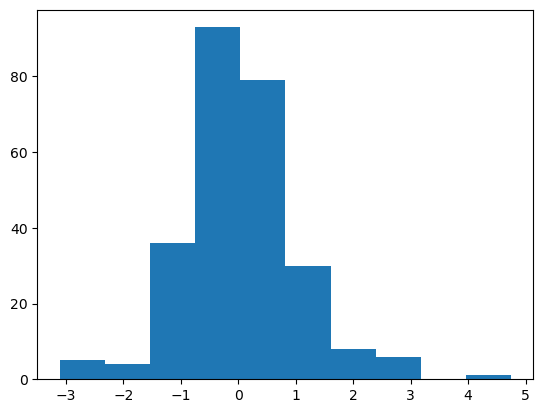

In [74]:
# AIR_JORDANのヒストグラムを描く

plt.hist( Data_new["AIR JORDAN"])